In [3]:
import numpy as np
import pandas as pd
import itertools as it

import importlib
import matplotlib.pyplot as plt
%matplotlib inline

import sys
sys.path.append("C:/Users/Tobias Giesgen/PycharmProjects/gempy")
sys.path.append("../")
import bayseg
import gempy as gp

In [4]:
# data import
data = pd.read_csv("../data/synthetic_well_data_3_layers_tilted.csv")   # load the data from excel sheet  
feature_names =  ['GR','NEUDEN','PE','IND'] #['GR','PHIND','PE','DeltaPHI','ILD_log10']  # define data that are considered by headers from excel sheet(Gamma Ray,Induction, Neutron-density, delta Neutron-density, Photoelectric effect)
boreholes = ['BH1','BH2','BH3','BH4','BH5'] 
# ['SHRIMPLIN','SHANKLE','LUKE G U','CROSS H CATTLE','NOLAN','Recruit F9','NEWBY','CHURCHMAN BIBLE'] 
# list(set(data.loc[:,'Well Name']))
#BH1 = data.loc[np.where(data == boreholes[1])[0],feature_names]             # extract all feature of one borehole
#coords = data.loc[np.where(data == boreholes[1])[0],'Z']

In [5]:
feature_vectors_norm = bayseg.normalize_feature_vectors(data.loc[:,feature_names])

In [6]:
# Investigate the number of labels (one label can include several cluster)
n, nft = bayseg.test_bic(feature_vectors_norm,12)

The optimal number of layers is:  3


In [8]:
# perform BaySeg clustering
clf = bayseg.BaySeg(feature_vectors_norm, n, data ,feature_names, boreholes, gp_resolution = 50, plot = '3dx')

Gempy model under construction:
Borehole zoning finished!
Compiling theano function...
Compilation Done!
Level of Optimization:  fast_compile
Device:  cpu
Precision:  float64
Number of faults:  0
Gempy model finished!


In [9]:
clf.geo_data.get_data('all')

G_x           G_y       G_z      X      Y      Z  \
interfaces   0            NaN           NaN       NaN   50.0   50.0   40.0   
             1            NaN           NaN       NaN   50.0  150.0   40.0   
             2            NaN           NaN       NaN  150.0   50.0  100.0   
             3            NaN           NaN       NaN  150.0  150.0  100.0   
             4            NaN           NaN       NaN  100.0  100.0   70.0   
             5            NaN           NaN       NaN   50.0   50.0   90.0   
             6            NaN           NaN       NaN   50.0  150.0   90.0   
             7            NaN           NaN       NaN  150.0   50.0  150.0   
             8            NaN           NaN       NaN  150.0  150.0  150.0   
             9            NaN           NaN       NaN  100.0  100.0  120.0   
             10           NaN           NaN       NaN   50.0   50.0  200.0   
             11           NaN           NaN       NaN   50.0  150.0  200.0   
             12           NaN           NaN       NaN  150.0   50.0  200.0   
             13           NaN           NaN       NaN  150.0  150.0  200.0   
             14           NaN           NaN       NaN  100.0  100.0  200.0   
             15           NaN           NaN       NaN   40.0   40.0   30.0   
orientations 0  -4.028158e-01  3.200703e-01  0.857493  100.0  100.0   70.0   
             1  -4.463843e-01  2.558256e-01  0.857493  100.0  100.0  120.0   
             2   1.000000e-07  1.000000e-07  1.000000  100.0  100.0  200.0   

                   azimuth         dip formation  formation_number  isFault  \
interfaces   0         NaN         NaN   Layer 1                 1    False   
             1         NaN         NaN   Layer 1                 1    False   
             2         NaN         NaN   Layer 1                 1    False   
             3         NaN         NaN   Layer 1                 1    False   
             4         NaN         NaN   Layer 1                 1    False   
             5         NaN         NaN   Layer 3                 2    False   
             6         NaN         NaN   Layer 3                 2    False   
             7         NaN         NaN   Layer 3                 2    False   
             8         NaN         NaN   Layer 3                 2    False   
             9         NaN         NaN   Layer 3                 2    False   
             10        NaN         NaN   Layer 2                 3    False   
             11        NaN         NaN   Layer 2                 3    False   
             12        NaN         NaN   Layer 2                 3    False   
             13        NaN         NaN   Layer 2                 3    False   
             14        NaN         NaN   Layer 2                 3    False   
             15        NaN         NaN  basement                 4    False   
orientations 0  -46.170152   30.963723   Layer 1                 1    False   
             1  -51.529984   30.963734   Layer 3                 2    False   
             2    0.000000  180.000000   Layer 2                 3    False   

                 order_series  polarity        series  
interfaces   0              1       NaN  Strat_Series  
             1              1       NaN  Strat_Series  
             2              1       NaN  Strat_Series  
             3              1       NaN  Strat_Series  
             4              1       NaN  Strat_Series  
             5              1       NaN  Strat_Series  
             6              1       NaN  Strat_Series  
             7              1       NaN  Strat_Series  
             8              1       NaN  Strat_Series  
             9              1       NaN  Strat_Series  
             10             1       NaN  Strat_Series  
             11             1       NaN  Strat_Series  
             12             1       NaN  Strat_Series  
             13             1       NaN  Strat_Series  
             14             1       NaN  Str

In [6]:
clf.geo_data.formations

,value,formation_number
Layer 2,1,1
Layer 3,2,2
Layer 1,3,3
basement,4,4


In [14]:
gp.plotting.plot_data_3D(clf.geo_data)

C:\Users\Public\Anaconda3\lib\site-packages\gempy\gempy_front.py:950: FutureWarning: gempy plotting functionality will be moved in version 1.2, use gempy.plotting module instead
  "use gempy.plotting module instead", FutureWarning)


In [24]:
gp.set_orientation_from_interfaces(clf.geo_data,[0,2,4])

[-5.14495755e-01 -1.35009822e-18  8.57492926e-01]


In [15]:
clf.geo_data.get_data('orientations')

,X,Y,Z,G_x,G_y,G_z,dip,azimuth,polarity,formation,series,formation_number,order_series,isFault
0,50.000000,116.667,50.0,9.996076e-08,-1.133178e-05,-1.0,0.000447,-0.000223,-1.0,Layer 1,Strat_Series,1,1,False
1,150.000000,83.3333,100.0,-1.288302e-07,-4.784555e-04,-1.0,0.000655,0.000197,-1.0,Layer 4,Strat_Series,2,1,False
2,83.333333,83.3333,150.0,1.000000e-07,1.000000e-07,1.0,180.000000,0.000000,1.0,Layer 2,Strat_Series,3,1,False
3,116.666667,116.667,200.0,1.000000e-07,1.000000e-07,1.0,180.000000,0.000000,1.0,Layer 3,Strat_Series,4,1,False


In [20]:
clf.fit(5, # number of iterations
        beta_jump_length=2, 
        mu_jump_length=0.0005, 
        cov_volume_jump_length=0.00005, 
        theta_jump_length=0.0000005, verbose=False, plot=False)

  0%|                                                                                            | 0/5 [00:00<?, ?it/s]

Gempy model under construction:
Borehole 1 of 5 is zoned...
Borehole 2 of 5 is zoned...
Borehole 3 of 5 is zoned...
Borehole 4 of 5 is zoned...
Borehole 5 of 5 is zoned...
Borehole zoning finished!
[-0.51449576  0.          0.85749293]
[-0.51449576  0.          0.85749293]
[0. 0. 1.]


 20%|████████████████▊                                                                   | 1/5 [00:02<00:08,  2.12s/it]

Gempy model under construction:
Borehole 1 of 5 is zoned...
Borehole 2 of 5 is zoned...
Borehole 3 of 5 is zoned...
Borehole 4 of 5 is zoned...
Borehole 5 of 5 is zoned...
Borehole zoning finished!
[-0.51449576  0.          0.85749293]
[-0.51449576  0.          0.85749293]
[0. 0. 1.]


 40%|█████████████████████████████████▌                                                  | 2/5 [00:04<00:06,  2.14s/it]

Gempy model under construction:
Borehole 1 of 5 is zoned...
Borehole 2 of 5 is zoned...
Borehole 3 of 5 is zoned...
Borehole 4 of 5 is zoned...
Borehole 5 of 5 is zoned...
Borehole zoning finished!
[-0.51449576  0.          0.85749293]
[-0.51449576  0.          0.85749293]
[0. 0. 1.]


 60%|██████████████████████████████████████████████████▍                                 | 3/5 [00:06<00:04,  2.12s/it]

Gempy model under construction:
Borehole 1 of 5 is zoned...
Borehole 2 of 5 is zoned...
Borehole 3 of 5 is zoned...
Borehole 4 of 5 is zoned...
Borehole 5 of 5 is zoned...
Borehole zoning finished!
[-0.51449576  0.          0.85749293]
[-0.51449576  0.          0.85749293]
[0. 0. 1.]


 80%|███████████████████████████████████████████████████████████████████▏                | 4/5 [00:08<00:02,  2.09s/it]

Gempy model under construction:
Borehole 1 of 5 is zoned...
Borehole 2 of 5 is zoned...
Borehole 3 of 5 is zoned...
Borehole 4 of 5 is zoned...
Borehole 5 of 5 is zoned...
Borehole zoning finished!
[-0.51449576  0.          0.85749293]
[-0.51449576  0.          0.85749293]
[0. 0. 1.]


100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:10<00:00,  2.08s/it]


In [14]:
# compare coordinates from GemPy grid and coordinates from raw well data (BaySeg)
print('Gempy coordinates        |      Well data coordinates')
print('_____________________________________________________')
for i in range(15):    
    print(clf.index_temp[clf.index_gempy[15+i*3]],'     |     ',clf.coords[15+i*3])

Gempy coordinates        |      Well data coordinates
_____________________________________________________
[ 50.8  50.8 161.7]      |      [ 50  50 160]
[ 50.8  50.8 191.1]      |      [ 50  50 190]
[ 50.8 149.2  18.9]      |      [ 50 150  20]
[ 50.8 149.2  48.3]      |      [ 50 150  50]
[ 50.8 149.2  81.9]      |      [ 50 150  80]
[ 50.8 149.2 111.3]      |      [ 50 150 110]
[ 50.8 149.2 140.7]      |      [ 50 150 140]
[ 50.8 149.2 170.1]      |      [ 50 150 170]
[ 50.8 149.2 199.5]      |      [ 50 150 200]
[149.2  50.8  31.5]      |      [150  50  30]
[149.2  50.8  60.9]      |      [150  50  60]
[149.2  50.8  90.3]      |      [150  50  90]
[149.2  50.8 119.7]      |      [150  50 120]
[149.2  50.8 149.1]      |      [150  50 150]
[149.2  50.8 178.5]      |      [150  50 180]


In [24]:
# compare Gibbs energies calcluated from Gempy model 2D (X,Y) and BaySeg well data 1D (Z)
print('Gibbs energy GemPy  |  Gibbs energy BaySeg   |   Likelihood')
print('______________________________________________________________________')
for i in range(15):# len(clf.gempy_energy)):
    print(np.around(clf.storage_gempy_e[-1][i],2),'   |   ',np.around(clf.storage_gibbs_e[-1][i],2),'   |   ',np.around(clf.storage_like_e[-1][i],2))

Gibbs energy GemPy  |  Gibbs energy BaySeg   |   Likelihood
______________________________________________________________________
[0.   2.61 2.61]    |    [0.   0.65 0.65]    |    [ -5.11 793.47 650.11]
[0.   2.61 2.61]    |    [0.   1.31 1.31]    |    [ -7.59 742.98 643.51]
[0.   2.61 2.61]    |    [0.   1.31 1.31]    |    [ -7.94 769.53 615.91]
[0.65 2.61 1.96]    |    [0.65 1.31 0.65]    |    [ -7.34 753.49 623.94]
[2.61 2.61 0.  ]    |    [0.65 1.31 0.65]    |    [ 776.4  2174.09   -7.01]
[2.61 0.65 1.96]    |    [1.31 1.31 0.  ]    |    [ 779.27 2184.78   -8.08]
[2.61 0.   2.61]    |    [1.31 1.31 0.  ]    |    [ 750.45 2149.11   -6.17]
[2.61 0.   2.61]    |    [1.31 1.31 0.  ]    |    [ 782.32 2235.68   -6.21]
[2.61 1.31 1.31]    |    [1.31 0.65 0.65]    |    [ 811.64 2298.55   -6.09]
[2.61 2.61 0.  ]    |    [1.31 0.65 0.65]    |    [1264.29   -8.06 2296.51]
[2.61 2.61 0.  ]    |    [1.31 0.   1.31]    |    [1198.01   -5.54 2263.08]
[0.   2.61 2.61]    |    [1.31 0.   1.31]    

In [25]:
# clf.storage_te[0]
# total energy = energy likelihood + gibbs energy # + gempy_energy (100*4)

In [57]:
# clf.storage_gibbs_e[0]  
# Size of all storage_files:
#  10 * 100 * 4  [iterations * data points * labels]

In [49]:
# clf.storage_like_e[0] 
# The higher the energy likelihood of a label for an element, 
#   the lower the likelihood that it belongs to that label

In [53]:
# clf.labels_probability[0]

In [ ]:
#clf.interp_data.update_interpolator(new_geo_data) # you only need to update when the input data changes (check with miguel)

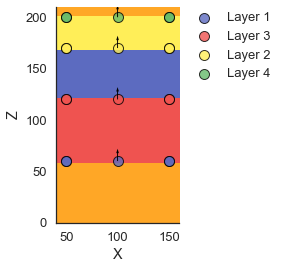

In [17]:
gp.plot_section(clf.geo_data, clf.lith_block[0], cell_number=10,  direction='y', plot_data=True)

In [96]:
#clf.lith_block[0].reshape(30,30,30)

In [102]:
coords = []
for i in range(len(clf.gempy.X.values)):
    coords.append( [item[i] for item in [clf.gempy.X.values, clf.gempy.Y.values, clf.gempy.Z.values]])

n = 4 # number of labels
var_t = []
var_bz = []

for i in range(2,len(BH1_norm)-(n-1)):
    if n == 2:
        var_t.append((np.sum(np.var(BH1_norm[0:i]))+np.sum(np.var(BH1_norm[i:-1])),i))
        var_bz.append((np.var([np.mean(BH1_norm[0:i]),np.mean(BH1_norm[i:-1])]),i))
    else:
        for j in range(i+2,len(BH1_norm)-(n-2)):
            if n == 3:
                var_t.append((np.sum(np.var(BH1_norm[0:i])) + np.sum(np.var(BH1_norm[i:j])) + np.sum(np.var(BH1_norm[j:-1])),i,j))
                var_bz.append((np.var([np.mean(BH1_norm[0:i]),np.mean(BH1_norm[i:j]),np.mean(BH1_norm[j:-1])]),i,j))
                #boundaries = np.where(var_t == min(var_t))[0][0] + 2
            else:
                for k in range(j+2,len(BH1_norm)-(n-3)):
                    if n == 4:
                        var_t.append((np.sum(np.var(BH1_norm[0:i])) + np.sum(np.var(BH1_norm[i:j])) + np.sum(np.var(BH1_norm[j:k]))+ np.sum(np.var(BH1_norm[k:-1])),i,j,k))
                        var_bz.append((np.var([np.mean(BH1_norm[0:i]),np.mean(BH1_norm[i:j]),np.mean(BH1_norm[j:k]),np.mean(BH1_norm[k:-1])]),i,j,k))
                    else:
                        for l in range(k+2,len(BH1_norm)-(n-4)): # check from here
                            if n == 5:
                                var_t.append((np.sum(np.var(BH1_norm[0:i])) + np.sum(np.var(BH1_norm[i:j])) + np.sum(np.var(BH1_norm[j:k]))+ np.sum(np.var(BH1_norm[k:l]))+ np.sum(np.var(BH1_norm[l:-1])),i,j,k,l))
                                var_bz.append((np.var([np.mean(BH1_norm[0:i]),np.mean(BH1_norm[i:j]),np.mean(BH1_norm[j:k]),np.mean(BH1_norm[k:-1])]),i,j,k))
                            else:
                                for m in range(l+2,len(BH1_norm)-(n-5)):
                                    if n == 6:
                                        var_t.append((np.sum(np.var(BH1_norm[0:i])) + np.sum(np.var(BH1_norm[i:j])) + np.sum(np.var(BH1_norm[j:k]))+ + np.sum(np.var(BH1_norm[k:l]))+ np.sum(np.var(BH1_norm[l:m]))+ np.sum(np.var(BH1_norm[m:-1])),i,j,k,l,m))
                                        var_bz.append((np.var([np.mean(BH1_norm[0:i]),np.mean(BH1_norm[i:j]),np.mean(BH1_norm[j:k]),np.mean(BH1_norm[k:-1])]),i,j,k))
                                    else: pass
                        
boundaries = min(var_t)[1:n]
boundaries2 = max(var_bz)[1:n]

***Plotting***

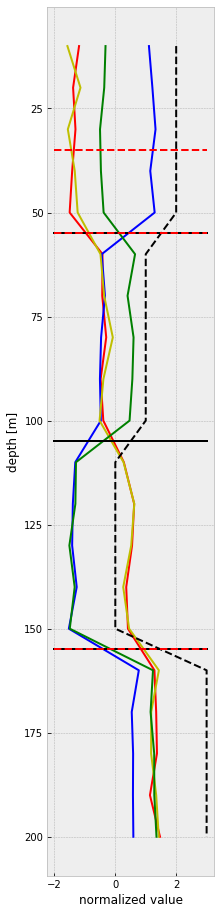

In [140]:
plt.figure(figsize = (3,16))
plt.plot(BH1_norm.loc[:,'PE'],coords,'r')
plt.plot(BH1_norm.loc[:,'GR'],coords,'b')
plt.plot(BH1_norm.loc[:,'IND'],coords,'y')
plt.plot(BH1_norm.loc[:,'NEUDEN'],coords,'g')
plt.plot(clf.labels[-1],coords,'k--')
for i in range(0,n-1):
    plt.plot(np.arange(-2,max(clf.labels[-1])+1),np.ones(len(np.arange(-2,max(clf.labels[-1])+1)))*coords[boundaries[i]]-5,'k')
for k in range(0,n-1):
    plt.plot(np.arange(-2,max(clf.labels[-1])+1),np.ones(len(np.arange(-2,max(clf.labels[-1])+1)))*coords[boundaries2[k]]-5,'r--')
plt.xlabel('normalized value')
plt.ylabel('depth [m]')
ax = plt.gca()
ax.invert_yaxis()